In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()

In [29]:
data = boston.data

In [30]:
feature_names = boston.feature_names

In [31]:
X = pd.DataFrame(data, columns = feature_names)

In [32]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
y = boston.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [40]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [42]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state = 42)

In [43]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [45]:
X_train_tsne.shape

(404, 2)

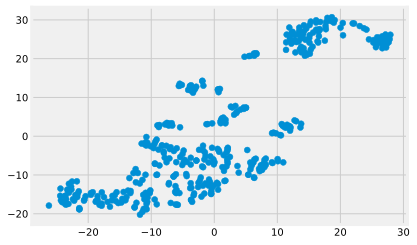

In [48]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [52]:
kmeans = KMeans(n_clusters = 3)

In [53]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [55]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

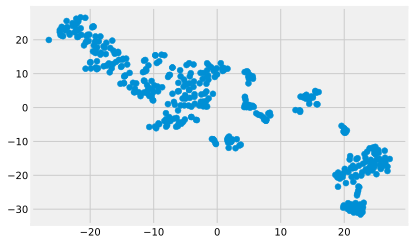

In [61]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

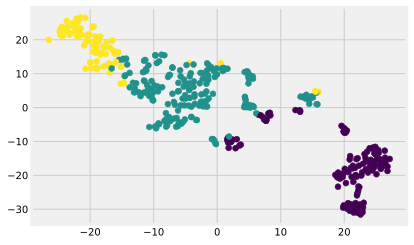

In [62]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [63]:
y_train.mean()

22.796534653465343

In [64]:
y_train[labels_train == 0].mean()

16.1796875

In [65]:
y_train[labels_train == 1].mean()

24.971204188481675

In [66]:
y_train[labels_train == 2].mean()

27.87411764705882

In [67]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Кластер 0: 10.715219062500003
Кластер 1: 0.42098554973821983
Кластер 2: 0.0721184705882353


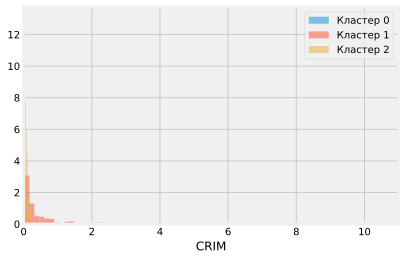

In [69]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 11)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()